   #                      Environmental Pollution Analysis
   ##                                     Air Quality Analysis
                               
Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.
The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.
The air quality is classified into one of the six buckets:Good,Moderate,Satisfactory,Poor,Very Poor,Severe. This dataset is to predict the air quality of states at daily level basis

Data Set Description

City: Indian Cities

Date: Date from 2015-2020

PM2.5: Fine particulate matter

PM10: Particulate Matter

NO: Nitirc Oxide

NO2: Nitrogen Dioxide

NH3:Ammonia

CO:Carbon Monoxide

SO2:Sulfur dioxide

O3:Ozone

Benzene:organic chemical compound with the molecular formula C₆H₆

Toluene: Substituted aromatic hydrocarbon

Xylene:Dimethylbenzene

AQI: An index for reporting air quality on a daily basis.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data collection

In [2]:
city_day=pd.read_csv("city_day.csv")

In [3]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [5]:
city_day.shape

(26219, 16)

In [6]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
city_day.nunique()

City             24
Date           1948
PM2.5         11293
PM10          11280
NO             5620
NO2            7200
NOx            7948
NH3            5821
CO             1779
SO2            4678
O3             7352
Benzene        1791
Toluene        3460
Xylene         1500
AQI             828
AQI_Bucket        6
dtype: int64

In [8]:
city_day.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

# 2. Preprocessing

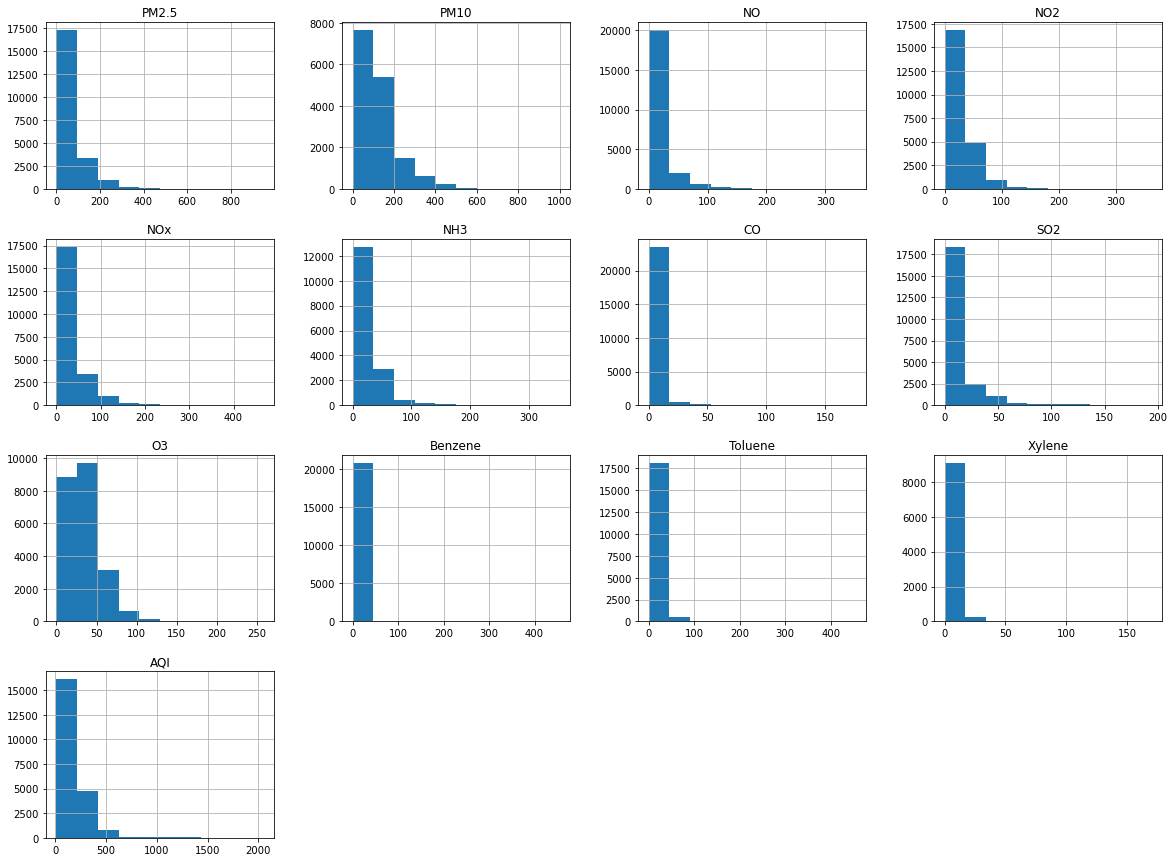

In [9]:
city_day.hist(figsize=(20,15))
plt.show()

In a skewed distribution, the outliers in the tail pull the mean away from the center towards the longer tail.
The median better represents the central tendency for the distribution.

In [10]:
nullvalues=city_day.isnull().sum().sort_values(ascending=False)
nullvalues

Xylene        16807
PM10          10766
NH3            9847
Toluene        7555
Benzene        5287
PM2.5          4289
AQI            4282
AQI_Bucket     4282
NOx            4043
O3             3660
SO2            3544
NO             3233
NO2            3217
CO             1961
City              0
Date              0
dtype: int64

In [11]:
null_values_percentage=(city_day.isnull().sum()/city_day.isnull().count()*100).sort_values(ascending=False)

In [12]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage

,Total,Percent
Xylene,16807,64.102369
PM10,10766,41.061825
NH3,9847,37.556734
Toluene,7555,28.814982
Benzene,5287,20.164766
PM2.5,4289,16.358366
AQI,4282,16.331668
AQI_Bucket,4282,16.331668
NOx,4043,15.420115
O3,3660,13.959342


# a. Checking Missing values

In [13]:
med_fill_col=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

#skewed features missing values are filled with median value

for i in med_fill_col:
    city_day[i].fillna(city_day[i].median(),inplace=True)
city_day.isnull().sum()        
          

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4282
dtype: int64

AQI_Bucket filled with moderate 

In [ ]:
city_day['AQI_Bucket']=city_day['AQI_Bucket'].fillna('Moderate')

In [ ]:
city_day.isnull().sum()

In [ ]:
cities=city_day["City"].value_counts()

In [ ]:
print(f"Total number of cities in data set:{len(cities)}")
print(cities.index)

In [ ]:
df=city_day.copy()

In [ ]:
df.shape

# b. Check for outliers

In [ ]:
sns.boxplot(df['CO'])

In [ ]:
Q1=np.percentile(df['CO'],25,interpolation="midpoint")
Q3=np.percentile(df['CO'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['CO']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'CO' values")



In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['CO'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['CO'] = np.where(df['CO']>ninetieth_percentile, ninetieth_percentile, df['CO'])

sns.boxplot(df['CO'])
plt.title("Boxplot of the 'CO' values after treating the outliers")

In [ ]:
sns.boxplot(df['NO'])

In [ ]:
Q1=np.percentile(df['NO'],25,interpolation="midpoint")
Q3=np.percentile(df['NO'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['NO']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'NO' values")


In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['NO'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['NO'] = np.where(df['NO']>ninetieth_percentile, ninetieth_percentile, df['NO'])

sns.boxplot(df['NO'])
plt.title("Boxplot of the 'NO' values after treating the outliers")

In [ ]:
df.columns


In [ ]:
sns.boxplot(df['NO2'])

In [ ]:
Q1=np.percentile(df['NO2'],25,interpolation="midpoint")
Q3=np.percentile(df['NO2'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['NO2']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'NO2' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['NO2'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['NO2'] = np.where(df['NO2']>ninetieth_percentile, ninetieth_percentile, df['NO2'])

sns.boxplot(df['NO2'])
plt.title("Boxplot of the 'NO2' values after treating the outliers")

In [ ]:
sns.boxplot(df['NOx'])

In [ ]:
Q1=np.percentile(df['NOx'],25,interpolation="midpoint")
Q3=np.percentile(df['NOx'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['NOx']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'NOx' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['NOx'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['NOx'] = np.where(df['NOx']>ninetieth_percentile, ninetieth_percentile, df['NOx'])

sns.boxplot(df['NOx'])
plt.title("Boxplot of the 'NOx' values after treating the outliers")

In [ ]:
sns.boxplot(df['NH3'])

In [ ]:
Q1=np.percentile(df['NH3'],25,interpolation="midpoint")
Q3=np.percentile(df['NH3'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['NH3']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'NH3' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['NH3'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['NH3'] = np.where(df['NH3']>ninetieth_percentile, ninetieth_percentile, df['NH3'])

sns.boxplot(df['NH3'])
plt.title("Boxplot of the 'NH3' values after treating the outliers")

In [ ]:
sns.boxplot(df['SO2'])

In [ ]:
Q1=np.percentile(df['SO2'],25,interpolation="midpoint")
Q3=np.percentile(df['SO2'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['SO2']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'SO2' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['SO2'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['SO2'] = np.where(df['SO2']>ninetieth_percentile, ninetieth_percentile, df['SO2'])

sns.boxplot(df['SO2'])
plt.title("Boxplot of the 'SO2' values after treating the outliers")

In [ ]:
sns.boxplot(df['O3'])

In [ ]:
Q1=np.percentile(df['O3'],25,interpolation="midpoint")
Q3=np.percentile(df['O3'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['O3']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'O3' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['O3'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['O3'] = np.where(df['O3']>ninetieth_percentile, ninetieth_percentile, df['O3'])

sns.boxplot(df['O3'])
plt.title("Boxplot of the 'O3' values after treating the outliers")

In [ ]:
sns.boxplot(df['Benzene'])

In [ ]:
Q1=np.percentile(df['Benzene'],25,interpolation="midpoint")
Q3=np.percentile(df['Benzene'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['Benzene']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'Benzene' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['Benzene'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['Benzene'] = np.where(df['Benzene']>ninetieth_percentile, ninetieth_percentile, df['Benzene'])

sns.boxplot(df['Benzene'])
plt.title("Boxplot of the 'Benzene' values after treating the outliers")

In [ ]:
sns.boxplot(df['Toluene' ])

In [ ]:
Q1=np.percentile(df['Toluene'],25,interpolation="midpoint")
Q3=np.percentile(df['Toluene'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['Toluene']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'Toluene' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['Toluene'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['Toluene'] = np.where(df['Toluene']>ninetieth_percentile, ninetieth_percentile, df['Toluene'])

sns.boxplot(df['Toluene'])
plt.title("Boxplot of the 'Toluene' values after treating the outliers")

In [ ]:
sns.boxplot(df['Xylene' ])

In [ ]:
Q1=np.percentile(df['Xylene'],25,interpolation="midpoint")
Q3=np.percentile(df['Xylene'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['Xylene']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'Xylene' values")

Not applyting outlier for Xylene 

In [ ]:
sns.boxplot(df['PM2.5' ])

In [ ]:
Q1=np.percentile(df['PM2.5'],25,interpolation="midpoint")
Q3=np.percentile(df['PM2.5'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['PM2.5']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'PM2.5' values")

Not applyting outlier for PM2.5

In [ ]:
sns.boxplot(df['PM10' ])

In [ ]:
Q1=np.percentile(df['PM10'],25,interpolation="midpoint")
Q3=np.percentile(df['PM10'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['PM10']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'PM10' values")

Not applyting outlier for PM10

In [ ]:
sns.boxplot(df['AQI' ])

In [ ]:
Q1=np.percentile(df['AQI'],25,interpolation="midpoint")
Q3=np.percentile(df['AQI'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df['AQI']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the 'AQI' values")

In [ ]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df['AQI'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df['AQI'] = np.where(df['AQI']>ninetieth_percentile, ninetieth_percentile, df['AQI'])

sns.boxplot(df['AQI'])
plt.title("Boxplot of the 'AQI' values after treating the outliers")

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(40, 30), 
color='blue');

In [ ]:
df.columns

In [ ]:
df

# d.Feature Reduction

# Correlation between variables (Pearson correlation)

In [ ]:
pearsonCorr = df.corr(method='pearson')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Here NH3,O3,Xylene shows low positive correlation

In [ ]:
spearmanCorr = df.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [ ]:
#Create mask for both correlation matrices
#Generating mask for upper triangle

maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Here NH3,O3,BTX  shows low positive correlation

# e. Feature engineering

In [ ]:
df['BTX'] = df['Benzene']+df['Toluene']+df['Xylene']
df['Particulate_Matter'] = df['PM2.5']+df['PM10']
df_1=df.drop(['Benzene','Toluene','Xylene',"PM2.5","PM10"],axis=1);

In [ ]:
df_1

# 3. EDA

In [ ]:
plt.title('air quality index')
sns.countplot(x=df_1['AQI_Bucket'])

In [ ]:
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [ ]:
pollutants = ['BTX','Particulate_Matter','NO2', 'CO', 'SO2','O3']

In [ ]:
city_day = df_1.copy()

In [ ]:
city_day

In [ ]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

# Univariate

In [ ]:
plot1=sns.distplot(city_day['CO'],kde=True,hist=True,bins=10)

In [ ]:
plot1=sns.distplot(city_day['NO'],kde=True,hist=True,bins=10)

In [ ]:
plot1=sns.distplot(city_day['NO2'],kde=True,hist=True,bins=10)

In [ ]:
plot1=sns.distplot(city_day['NOx'],kde=True,hist=True,bins=10)

In [ ]:
plot1=sns.distplot(city_day['NH3'],kde=True,hist=True,bins=10)

In [ ]:
plot1=sns.distplot(city_day['SO2'],kde=True,hist=True,bins=10)

In [ ]:
plot1=sns.distplot(city_day['O3'],kde=True,hist=True,bins=10)

In [ ]:
plot1=sns.distplot(city_day['Particulate_Matter'],kde=False,hist=True,bins=20,hist_kws=dict(edgecolor='k',linewidth='2'),color='Green',label='PM10')

# Bivariate

In [ ]:
city_day[['SO2', 'City']].groupby(['City']).median().sort_values("SO2", ascending = False).plot.bar()

SO2 level is highest in Ahmedabad and lowest in Ernakulam.

In [ ]:
city_day[['NO2', 'City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color = 'r')

Here also NO2 level is higher in Ahmedabad and lowest in Aizawl

In [ ]:
df_1['Date'] = pd.to_datetime(df_1['Date'], format = '%m/%d/%Y')
df_1['Year'] = df_1['Date'].dt.year # year
df_1['Year'] = df_1['Year'].fillna(0.0).astype(int)
data = df_1[(df_1['Year']>0)]

In [ ]:
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by City and Year'.format('SO2'))
sns.heatmap(df_1.pivot_table('SO2', index = 'City',
                columns = ['Year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

It is evident from the heatmap that the presence of SO2 is high in Ahmedabad since 2019, Delhi has experienced high level of SO2 in 2016 and 2017 the gradually decreased, Jorapokhar,Patna,Talcher witnessed a sudden increase in SO2 2017,2018 and 2019

In [ ]:
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by City and Year'.format('NO2'))
sns.heatmap(df_1.pivot_table('NO2', index = 'City',
                columns = ['Year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

The NO2 concentration has decreased annually in some cities like Ahmedabad, Amaravati,whereas in cities like Bengaluru, Lucknow, it has increased. In other cities like Delhi,Patna the NO2 concentrations have remained consistently high.

# c. Encoding

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df_1.City=le.fit_transform(df_1.City)
df_1.Date=le.fit_transform(df_1.Date)
df_1.AQI_Bucket=le.fit_transform(df_1.AQI_Bucket)


# 4.Modelling

In [ ]:
from sklearn.model_selection import train_test_split

x = df_1.drop("AQI_Bucket",axis=1)
y = df_1["AQI_Bucket"]
results_arr = {'Accuracy':[],'MSE':[]}

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [ ]:
#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error
logit_reg=LogisticRegression()
model=logit_reg.fit(X_train,y_train)
predictions=model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

In [ ]:
#Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

In [ ]:
## SVM

In [ ]:

from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

In [ ]:
#KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    predictions=classifier.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    values.append(acc)
plt.plot(neighbors,values,'o-')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

In [ ]:
#Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

From this we can concluded that Random Forest have least MSE value(0.016)and high accuracy (0.985).

# 5.Model fine tuning

From the comparison of various regressor models , the model with low MSE Value is taken for model fine tuning. So Random Forest Regressor is choosen for model fine tuning.

In [ ]:


rf = RandomForestClassifier(n_estimators=500,max_depth=50,random_state=42,criterion='entropy')
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
results_arr['Accuracy'].append(accuracy)
results_arr['MSE'].append(MSE)
print('Accuracy is',accuracy)
print('MSE is',MSE)
print(cm)

CONCLUSION:
The majorly affected states in India by air pollution belong to the northern region. Citys like Ahmedabad,Patna and Delhi are heavily polluted and require immediate action.